In [ ]:
 #RANDOM WALK METROPOLIS HASTINGS 
 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import multivariate_normal

from google.colab import files

In [ ]:
def HMCMC(U, grad_U, epsilon, L, inicial_q, N):
  #En el primer paso nuevos valores son  escogidos para el momentum, p, aleatoriamente de una distribución normal, y son independientes de la posición q. 
  mu, sigma = 0, 1 # Parametros de la normal
  
  q = inicial_q #El punto de inicio del algoritmo
  cadena=q
  rechazos=0

  for i in range(1,N): 

    p = np.array([np.random.normal(mu, sigma, q.shape[1])])  #Asignamos el nuevo valor de p, independiente de q

    actual_p = p  
    p=p- epsilon * grad_U(q) / 2
    for i in range(1,L+1):
      q= q+epsilon*p
      if(i!=L):
        p=p-epsilon*grad_U(q)
    p= p - epsilon * grad_U(q) / 2   ##termina el algoritmo de Leap Frog 
  # Hacemos la propuesta simétrica cambiando el signo 
    p = -p
    actual_U = U(inicial_q)
    actual_K = np.sum(actual_p**2) / 2
    propuesta_U = U(q)
    propuesta_K = np.sum(p**2) / 2
    if random.uniform(0, 1) < np.exp(actual_U-propuesta_U+actual_K-propuesta_K):
      cadena=np.r_[cadena,q]
      inicial_q=q

    else:
      cadena=np.r_[cadena,inicial_q]
      rechazos=rechazos+1
  return(cadena, rechazos)


In [ ]:
sigma_bivariada=np.array([[1,-0.85],[-0.85,1]])
sigma_bivariada_inv=np.linalg.inv(sigma_bivariada)
def U(q):
  return(1/2*q.dot( sigma_bivariada_inv ).dot(np.transpose(q))[0][0])    #El logaritmo de la densidad que queremos simular, U(q) hacer referencia a la funcion de energía potencial 

def grad_U(q):   #El gradiente de la función U, que se utilizará para resolver el sistema de ecuaciones dado por las dinámicas hamiltonianas
 return(np.transpose(sigma_bivariada_inv.dot(np.transpose(q))))


#epsilon 0.15, L=35, N=30

In [ ]:
np.random.seed(0)
random.seed(0)
simulacion=HMCMC(U,grad_U,0.15,35,np.array([[-7,-7]]),30)
cadena_bruta= simulacion[0]
tasa_rechazo= simulacion[1]/(cadena_bruta.shape[0]-1)
tasa_aceptacion = 1- tasa_rechazo
tasa_aceptacion

1.0

[]

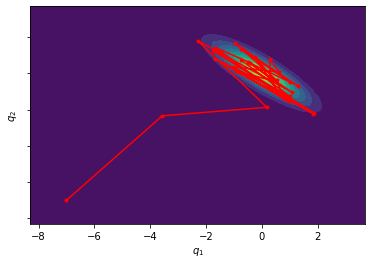

In [ ]:

x, y = np.mgrid[-8.3:3.8:.2, -8.3:3.8:.2]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, -0.85], [-0.85, 1]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos), 10)
plt.plot(cadena_bruta[:,0], cadena_bruta[:,1], '.', c='red')
plt.plot(cadena_bruta[:,0], cadena_bruta[:,1], "r")

plt.ylabel(r'$q_{2}$')
plt.xlabel(r'$q_{1}$')
plt.gca().axes.yaxis.set_ticklabels([])

#plt.savefig("biv_ham.png",bbox_inches='tight',dpi=300)
#files.download("biv_ham.png")

#RWMH

In [ ]:
sigma_bivariada=np.array([[1,-0.85],[-0.85,1]])

def U(q):
  return(np.exp(-1/2*q.dot(np.linalg.inv(sigma_bivariada)).dot(np.transpose(q))[0][0]))    #El logaritmo de la densidad que queremos simular, U(q) hacer referencia a la funcion de energía potencial 

def RWMH(p_ini, densidad, mu, sigma, N):
  contador=0     #vector de muestras
  muestra=p_ini        #primera posición nuestro punto inicial
  for i in range(1, N):           
    propuesta=p_ini+np.random.normal(mu, sigma, p_ini.shape[1])    #el valor propuesto 
    #razon = min(densidad(propuesta)/densidad(p_ini),1)
    razon = min(densidad(propuesta)/densidad(p_ini),1)
    if random.uniform(0, 1) < razon:
      actual=propuesta
      p_ini=propuesta
      
    else:
      actual=p_ini
      contador=contador+1
    muestra=np.r_[muestra,actual]
  #uno es el punto inicial y en la ultima posicion esta el porcentaje
  return(muestra, contador)


In [ ]:
np.random.seed(0)
random.seed(0)
muestra=RWMH(np.array([[-7,-7]]),U,0,0.15, 30*35)


In [ ]:
tasa_rechazo2= muestra[1]/(muestra[0].shape[0]-1)
tasa_aceptacion2 = 1- tasa_rechazo2
tasa_aceptacion2

0.8303145853193518

In [ ]:
simulaciones2=muestra[0]
simulacion2= simulaciones2[np.arange(0,len(simulaciones2),35)]
len(simulacion2)

30

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

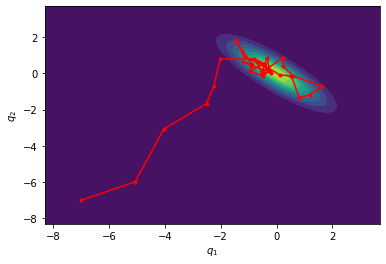

In [ ]:

x, y = np.mgrid[-8.3:3.8:.2, -8.3:3.8:.2]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, -0.85], [-0.85, 1]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos), 10)
plt.plot(simulacion2[:,0],simulacion2[:,1], '.', c='red')
plt.plot(simulacion2[:,0], simulacion2[:,1], "r")

plt.ylabel(r'$q_{2}$')
plt.xlabel(r'$q_{1}$')

plt.savefig("biv_rwmh.png",bbox_inches='tight',dpi=300)
files.download("biv_rwmh.png")